# Employee Churn Analysis Project

## Determines
In this project we have HR data of a company. A study is requested from us to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

We can describe 10 attributes in detail as:

- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which we can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from yellowbrick.cluster import KElbowVisualizer
import pickle
import warnings

warnings.filterwarnings("ignore")

scoring = {'f1_score' : make_scorer(f1_score),
           'accuracy' : make_scorer(accuracy_score)}

pd.options.display.float_format = '{:.2f}'.format

### Loading Dataset

In [2]:
df = pd.read_csv("HR_Dataset.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe() # describe numerical values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [6]:
df[["Departments ", "salary"]].describe() # describe object type

,Departments,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Data Insights

In the given dataset, we have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics. Here, we can find the average of both the groups using groupby() and mean() function.

In [7]:
# df_left as churned customer and df_stay as stayed customer

df_left = df[df["left"] == 1] 
df_stay = df[df["left"] == 0]

print("Number of churned customer:", df_left.shape[0])
print("Number of stayed customer:", df_stay.shape[0])

Number of churned customer: 3571
Number of stayed customer: 11428


In [8]:
df_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.00,3571.00,3571.00,3571.00,3571.00,3571.00,3571.00,3571.00
mean,0.44,0.72,3.86,207.42,3.88,0.05,1.00,0.01
std,0.26,0.20,1.82,61.20,0.98,0.21,0.00,0.07
min,0.09,0.45,2.00,126.00,2.00,0.00,1.00,0.00
25%,0.13,0.52,2.00,146.00,3.00,0.00,1.00,0.00
50%,0.41,0.79,4.00,224.00,4.00,0.00,1.00,0.00
75%,0.73,0.90,6.00,262.00,5.00,0.00,1.00,0.00
max,0.92,1.00,7.00,310.00,6.00,1.00,1.00,1.00


In [9]:
df_stay.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.00,11428.00,11428.00,11428.00,11428.00,11428.00,11428.00,11428.00
mean,0.67,0.72,3.79,199.06,3.38,0.18,0.00,0.03
std,0.22,0.16,0.98,45.68,1.56,0.38,0.00,0.16
min,0.12,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.54,0.58,3.00,162.00,2.00,0.00,0.00,0.00
50%,0.69,0.71,4.00,198.00,3.00,0.00,0.00,0.00
75%,0.84,0.85,4.00,238.00,4.00,0.00,0.00,0.00
max,1.00,1.00,6.00,287.00,10.00,1.00,0.00,1.00


* Stayed employees have better satisfaction level than churned employees. <br><br> 
* We can say that, churned employees were not happy at work. <br><br> 
* Both group has nearly close evaluaton piont from employer shows that most of the churned employees left willingly from company if there was not an extraordinary situations such as economical crisis. <br><br> 
* Number of project and average monthly hours and time spend in company bring into that company lose more experienced employee and they were working more projects and spending more hours for company to compare with stayed employees. <br><br> 
* Surprisingly employees who stayed in the company have more work accident ratio. And promotion has significant role in  people's choice and churned employees has less promotion rate.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

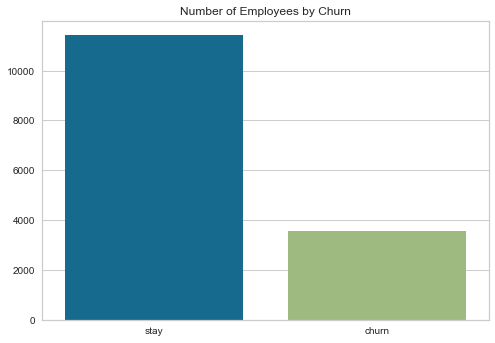

In [10]:
emp = df["left"].replace({1:"stay", 0:"churn"})
plt.title("Number of Employees by Churn")
sns.barplot(x=emp.unique(), y=emp.value_counts().values)
plt.show()

### Satisfaction Level

In [11]:
df.groupby("left")["satisfaction_level"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.00,0.67,0.22,0.12,0.54,0.69,0.84,1.00
1,3571.00,0.44,0.26,0.09,0.13,0.41,0.73,0.92


Total number for people who is in satisfaction class HIGH : 4268
Total number for people who is in satisfaction class LOW : 1646
Total number for people who is in satisfaction class NORMAL : 3605
Total number for people who is in satisfaction class VERY HIGH : 4002
Total number for people who is in satisfaction class VERY LOW : 1478


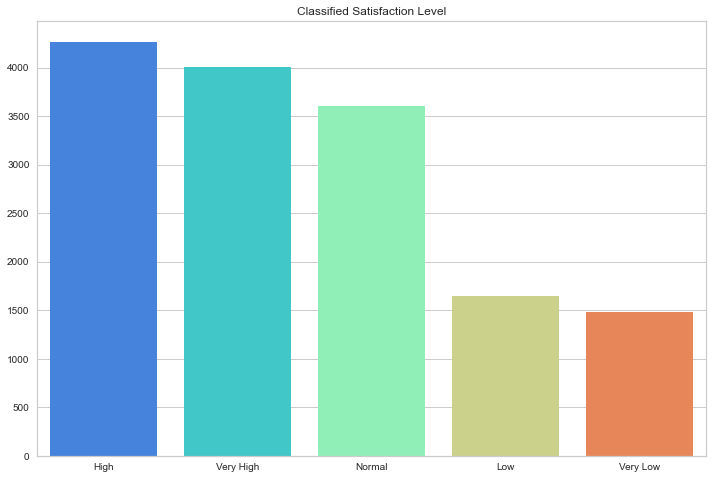

In [12]:
def satisfact(x):
    
    """This function classifies satisfaction level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["satisfaction_class"] = df["satisfaction_level"].apply(satisfact)

for i in df.groupby("satisfaction_class")["left"].count().index:
    print("Total number for people who is in satisfaction class", i.upper(),":", df.groupby("satisfaction_class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Satisfaction Level")
sns.barplot(x=df["satisfaction_class"].value_counts().index, y=df["satisfaction_class"].value_counts().values, palette="rainbow")
plt.show()

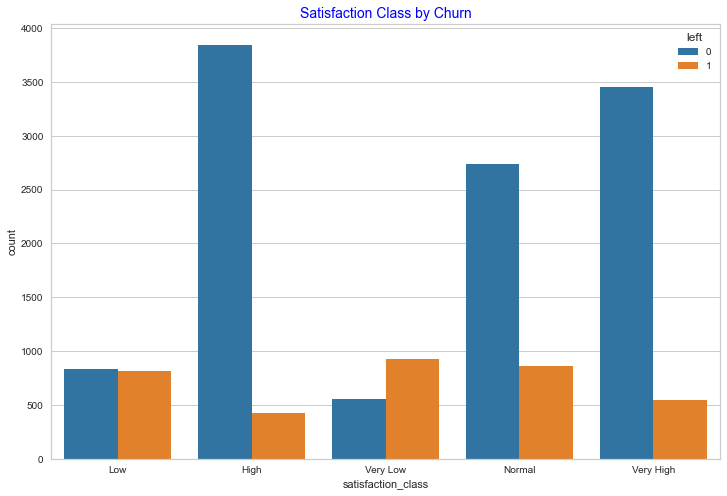

In [13]:
plt.figure(figsize=(12, 8))

plt.title("Satisfaction Class by Churn", c="blue", size=14)
sns.countplot(x="satisfaction_class", hue="left", data=df, palette="tab10")
plt.show()

* People who have low satisfaction level have most churn rate.

### Last Evaluation

In [14]:
df.groupby("left")["last_evaluation"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.00,0.72,0.16,0.36,0.58,0.71,0.85,1.00
1,3571.00,0.72,0.20,0.45,0.52,0.79,0.90,1.00


Total number for people who is in last evaluation class HIGH : 4547
Total number for people who is in last evaluation class LOW : 236
Total number for people who is in last evaluation class NORMAL : 4727
Total number for people who is in last evaluation class VERY HIGH : 5489


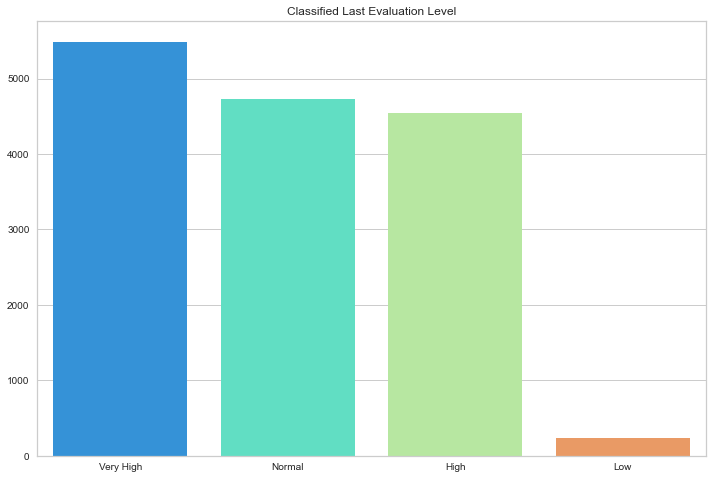

In [15]:
def evaluation(x):
    
    """This function classifies evaluation level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["last_evaluation_class"] = df["last_evaluation"].apply(evaluation)

for i in df.groupby("last_evaluation_class")["left"].count().index:
    print("Total number for people who is in last evaluation class", i.upper(),":", df.groupby("last_evaluation_class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Last Evaluation Level")
sns.barplot(x=df["last_evaluation_class"].value_counts().index, y=df["last_evaluation_class"].value_counts().values, palette="rainbow")
plt.show()

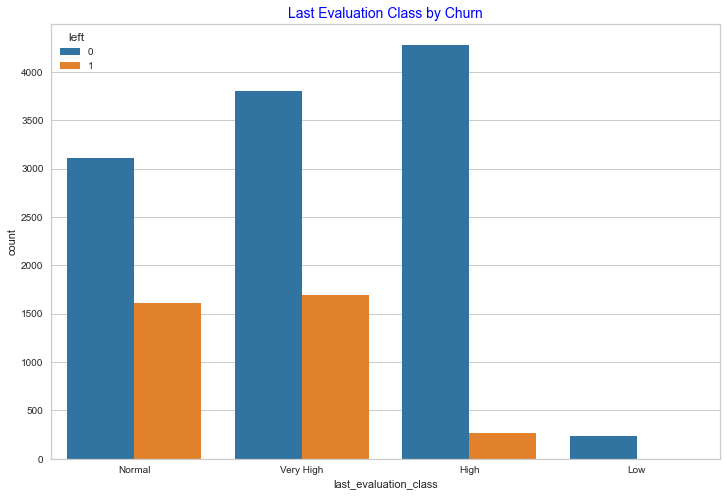

In [16]:
plt.figure(figsize=(12, 8))

plt.title("Last Evaluation Class by Churn", c="blue", size=14)
sns.countplot(x="last_evaluation_class", hue="left", data=df, palette="tab10")
plt.show()

In [17]:
df.groupby("last_evaluation_class")["left"].value_counts(normalize=True)

last_evaluation_class  left
High                   0      0.94
                       1      0.06
Low                    0      1.00
Normal                 0      0.66
                       1      0.34
Very High              0      0.69
                       1      0.31
Name: left, dtype: float64

* Employee who have low last evaluation point prefer to stay with company. Company lost employees from normal and very high class in their last evaluation

### Average Monthly Hours

In [18]:
df.groupby("left")["average_montly_hours"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.00,199.06,45.68,96.00,162.00,198.00,238.00,287.00
1,3571.00,207.42,61.20,126.00,146.00,224.00,262.00,310.00


Total number for people who is in average monthly hours class < 100 : 54
Total number for people who is in average monthly hours class < 200 : 7412
Total number for people who is in average monthly hours class < 300 : 7374
Total number for people who is in average monthly hours class >= 300 : 159


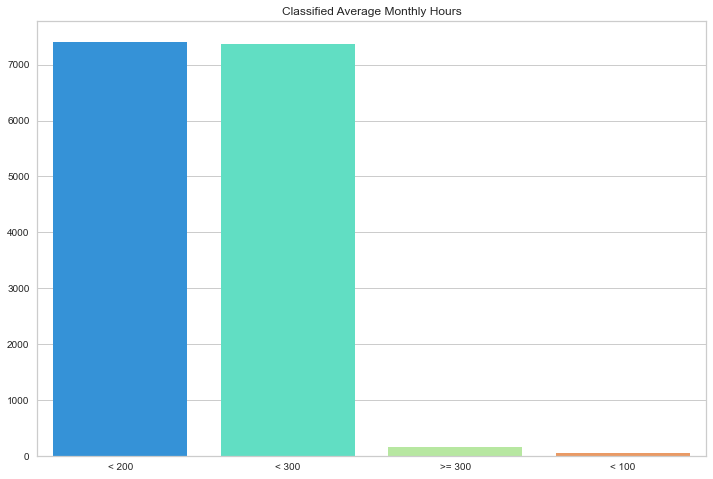

In [19]:
def monthly_hour(x):
    
    """This function classifies average monthly hours!!!"""
    
    if x < 100:
        return "< 100"
    elif x < 200:
        return "< 200"
    elif x <= 300:
        return "< 300"
    elif x >= 300:
        return ">= 300"
    
df["average_montly_hours_class"] = df["average_montly_hours"].apply(monthly_hour)

for i in df.groupby("average_montly_hours_class")["left"].count().index:
    print("Total number for people who is in average monthly hours class", i.upper(),":", df.groupby("average_montly_hours_class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Average Monthly Hours")
sns.barplot(x=df["average_montly_hours_class"].value_counts().index, y=df["average_montly_hours_class"].value_counts().values, palette="rainbow")
plt.show()

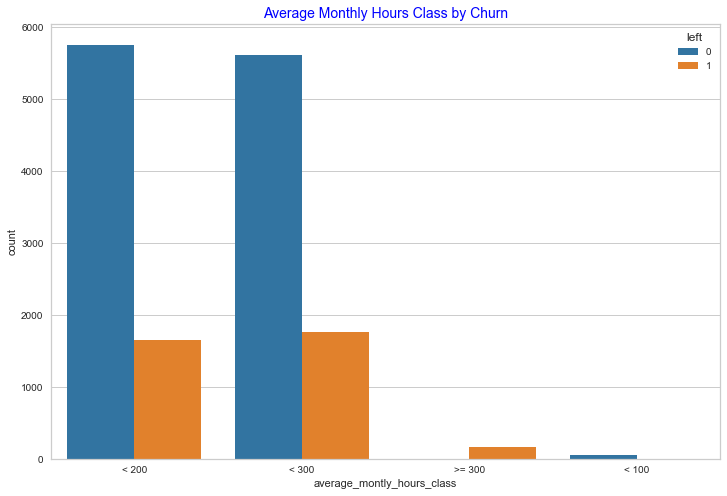

In [20]:
plt.figure(figsize=(12, 8))

plt.title("Average Monthly Hours Class by Churn", c="blue", size=14)
sns.countplot(x="average_montly_hours_class", hue="left", data=df, palette="tab10")
plt.show()

In [21]:
df.groupby("average_montly_hours_class")["left"].value_counts(normalize=True)

average_montly_hours_class  left
< 100                       0      1.00
< 200                       0      0.78
                            1      0.22
< 300                       0      0.76
                            1      0.24
>= 300                      1      1.00
Name: left, dtype: float64

* People who work more average hours than other employees quit job.

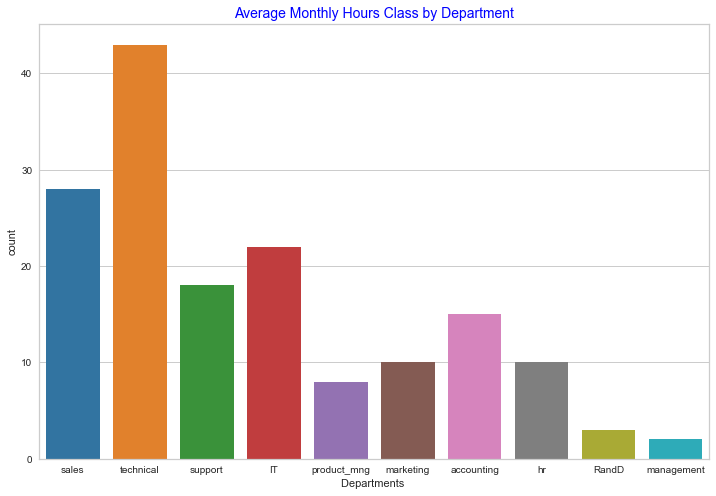

In [22]:
plt.figure(figsize=(12, 8))

plt.title("Average Monthly Hours Class by Department", c="blue", size=14)
sns.countplot(x="Departments ", data=df[df["average_montly_hours_class"] == ">= 300"], palette="tab10")
plt.show()

* Technical department has the most number of employee who work more than 300 hours in month. All of these employees churn from their company. 

### Number of Projects

Similarly, we can also plot a bar graph to count the number of employees deployed on how many projects?

Total number for people who work in 2 projects: 2388
Total number for people who work in 3 projects: 4055
Total number for people who work in 4 projects: 4365
Total number for people who work in 5 projects: 2761
Total number for people who work in 6 projects: 1174
Total number for people who work in 7 projects: 256


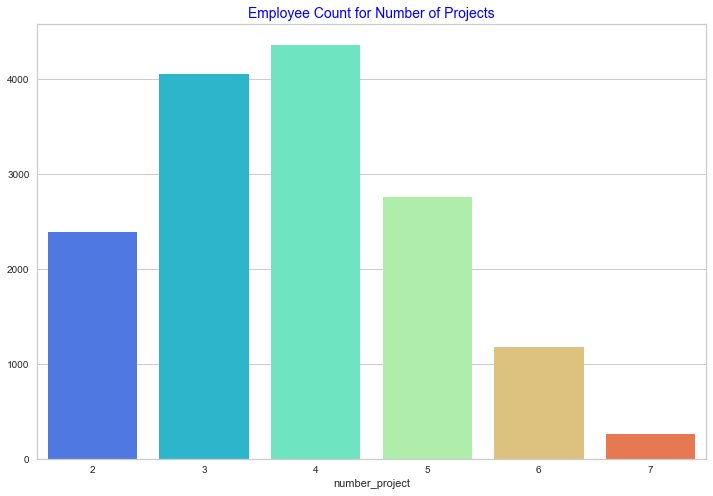

In [23]:
for i in df.groupby("number_project")["left"].count().index:
    print("Total number for people who work in", str(i), "projects:", df.groupby("number_project")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Count for Number of Projects", c="blue", size=14)
sns.barplot(x = df.groupby("number_project")["left"].count().index, y = df.groupby("number_project")["left"].count().values, palette="rainbow")
plt.show()

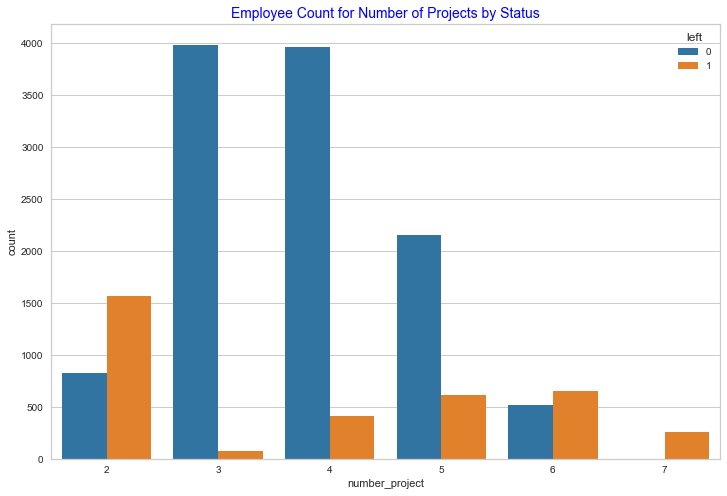

In [24]:
plt.figure(figsize=(12, 8))

plt.title("Employee Count for Number of Projects by Status", c="blue", size=14)
sns.countplot(x="number_project", hue="left", data=df, palette="tab10")
plt.show()

* People who have assigned to 7 projects mostly churned. 

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


Total number for people who have  2 year experience : 3244
Total number for people who have  3 year experience : 6443
Total number for people who have  4 year experience : 2557
Total number for people who have  5 year experience : 1473
Total number for people who have  6 year experience : 718
Total number for people who have  7 year experience : 188
Total number for people who have  8 year experience : 162
Total number for people who have  10 year experience : 214


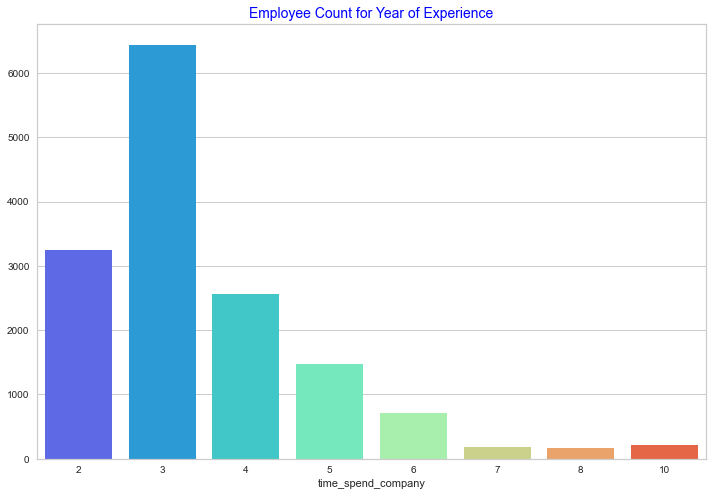

In [25]:
for i in df.groupby("time_spend_company")["left"].count().index:
    print("Total number for people who have ", str(i), "year experience :", df.groupby("time_spend_company")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Count for Year of Experience", c="blue", size=14)
sns.barplot(x = df.groupby("time_spend_company")["left"].count().index, y = df.groupby("time_spend_company")["left"].count().values, palette="rainbow")
plt.show()

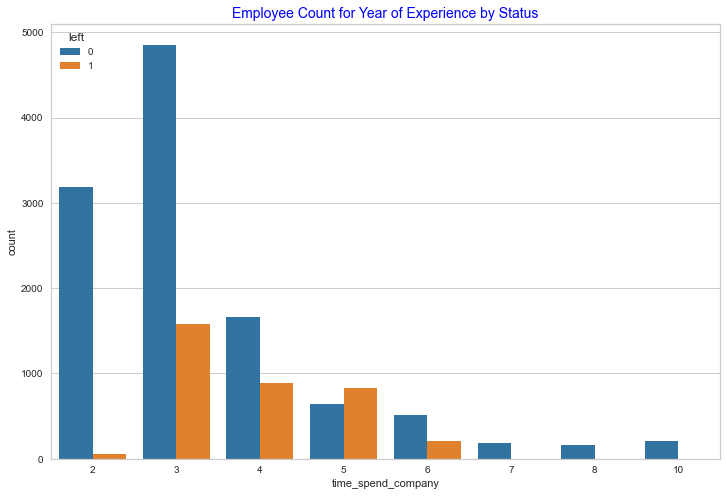

In [26]:
plt.figure(figsize=(12, 8))
plt.title("Employee Count for Year of Experience by Status", c="blue", size=14)
sns.countplot(x="time_spend_company", hue="left", data=df, palette="tab10")
plt.show()

* Experienced employees mostly stay with company. However, 5 year is a threshold for most people to churn.

In [27]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,satisfaction_class,last_evaluation_class,average_montly_hours_class
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Normal,< 200
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Very High,< 300
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Very Low,Very High,< 300


### Departmens

Number of people work in IT department: 1227
Number of people work in RANDD department: 787
Number of people work in ACCOUNTING department: 767
Number of people work in HR department: 739
Number of people work in MANAGEMENT department: 630
Number of people work in MARKETING department: 858
Number of people work in PRODUCT_MNG department: 902
Number of people work in SALES department: 4140
Number of people work in SUPPORT department: 2229
Number of people work in TECHNICAL department: 2720


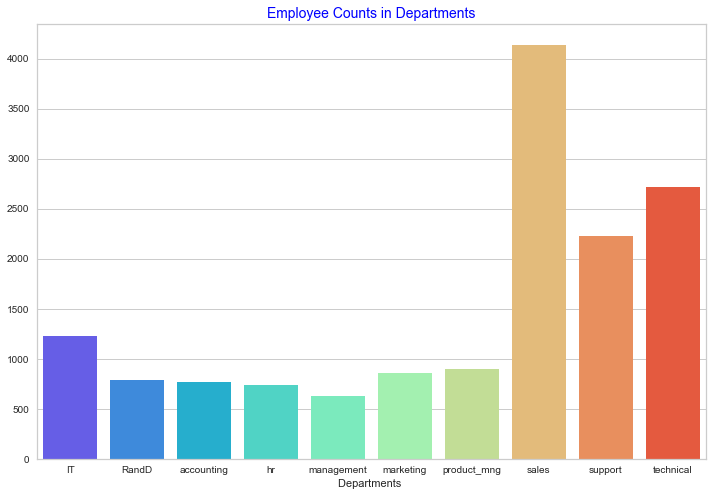

In [28]:
for i in df.groupby("Departments ")["left"].count().index:
    print("Number of people work in", i.upper(),  "department:", df.groupby("Departments ")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Counts in Departments", c="blue", size=14)
sns.barplot(x = df.groupby("Departments ")["left"].count().index, y = df.groupby("Departments ")["left"].count().values, palette="rainbow")
plt.show()

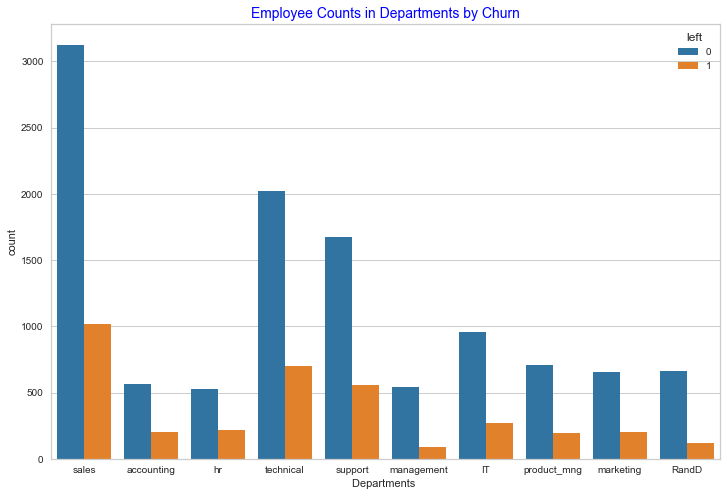

In [29]:
plt.figure(figsize=(12, 8))
plt.title("Employee Counts in Departments by Churn", c="blue", size=14)
sns.countplot(x="Departments ", hue="left", data=df, palette="tab10")
plt.show()

In [30]:
df.groupby("Departments ")["left"].value_counts(normalize=True)

Departments   left
IT            0      0.78
              1      0.22
RandD         0      0.85
              1      0.15
accounting    0      0.73
              1      0.27
hr            0      0.71
              1      0.29
management    0      0.86
              1      0.14
marketing     0      0.76
              1      0.24
product_mng   0      0.78
              1      0.22
sales         0      0.76
              1      0.24
support       0      0.75
              1      0.25
technical     0      0.74
              1      0.26
Name: left, dtype: float64

* HR department has the most churn rate.

### Salary

Number of people in  HIGH salary scale: 1237
Number of people in  LOW salary scale: 7316
Number of people in  MEDIUM salary scale: 6446


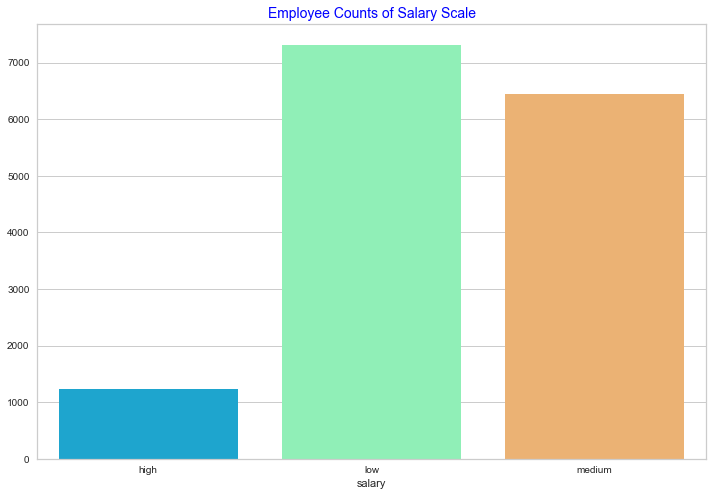

In [31]:
for i in df.groupby("salary")["left"].count().index:
    print("Number of people in ", i.upper(),  "salary scale:", df.groupby("salary")["left"].count().loc[i])### Salary

plt.figure(figsize=(12, 8))
plt.title("Employee Counts of Salary Scale", c="blue", size=14)
sns.barplot(x = df.groupby("salary")["left"].count().index, y = df.groupby("salary")["left"].count().values, palette="rainbow")
plt.show()

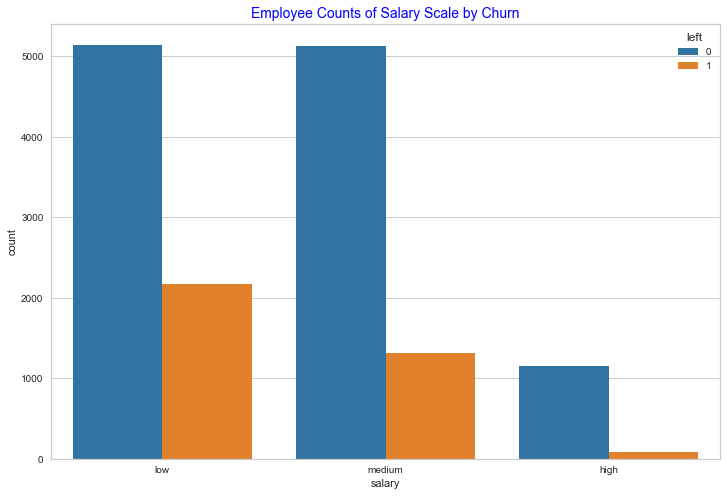

In [32]:
plt.figure(figsize=(12, 8))
plt.title("Employee Counts of Salary Scale by Churn", c="blue", size=14)
sns.countplot(x="salary", hue="left", data=df, palette="tab10")
plt.show()

In [33]:
df.groupby("salary")["left"].value_counts(normalize=True)

salary  left
high    0      0.93
        1      0.07
low     0      0.70
        1      0.30
medium  0      0.80
        1      0.20
Name: left, dtype: float64

* Employees who works with low salary have higher churn rate.

### Work Accident

0 number of accident : 12830
1 number of accident : 2169


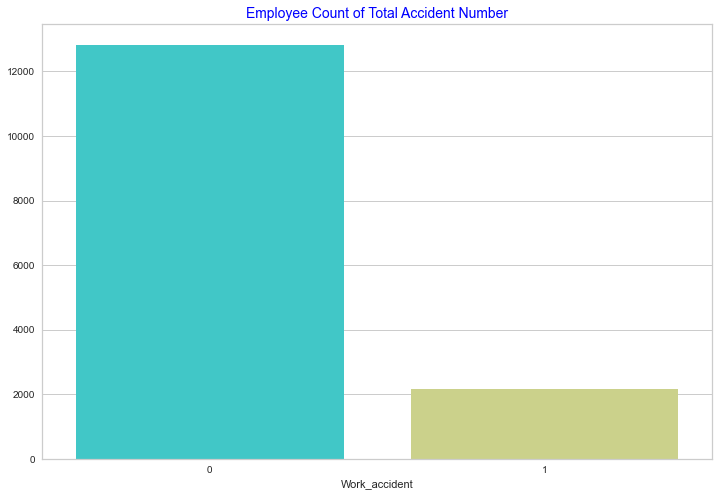

In [34]:
for i in df.groupby("Work_accident")["left"].count().index:
    print(i, "number of accident :", df.groupby("Work_accident")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Count of Total Accident Number", c="blue", size=14)
sns.barplot(x = df.groupby("Work_accident")["left"].count().index, y = df.groupby("Work_accident")["left"].count().values, palette="rainbow")
plt.show()

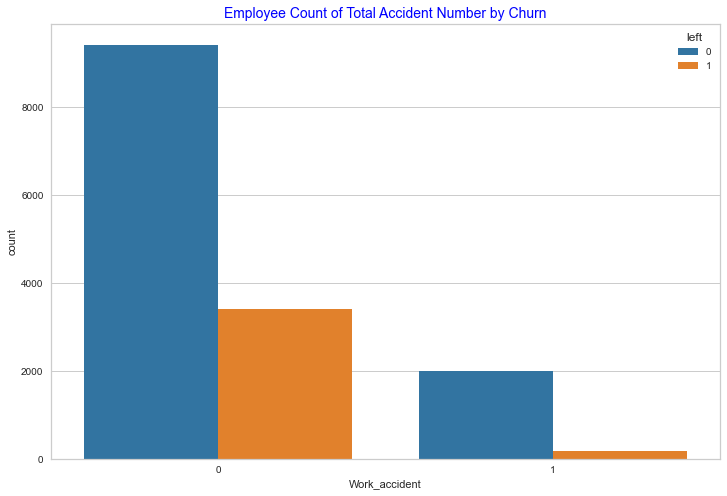

In [35]:
plt.figure(figsize=(12, 8))
plt.title("Employee Count of Total Accident Number by Churn", c="blue", size=14)
sns.countplot(x="Work_accident", hue="left", data=df, palette="tab10")
plt.show()

In [36]:
df.groupby("Work_accident")["left"].value_counts(normalize=True)

Work_accident  left
0              0      0.73
               1      0.27
1              0      0.92
               1      0.08
Name: left, dtype: float64

* Most of the employees who had a work accident, preferred to stay in company.

### Promotion Last 5 Year

No number of employee promoted within last 5 years: 14680
Yes number of employee promoted within last 5 years: 319


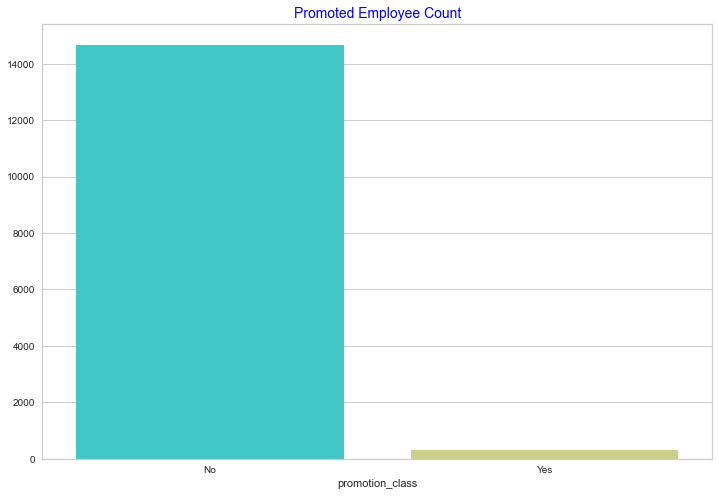

In [37]:
def promotion(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
    
df["promotion_class"] = df["promotion_last_5years"].apply(promotion)

for i in df.groupby("promotion_class")["left"].count().index:
    print(i, "number of employee promoted within last 5 years:", df.groupby("promotion_class")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Promoted Employee Count", c="blue", size=14)
sns.barplot(x = df.groupby("promotion_class")["left"].count().index, y = df.groupby("promotion_class")["left"].count().values, palette="rainbow")
plt.show()

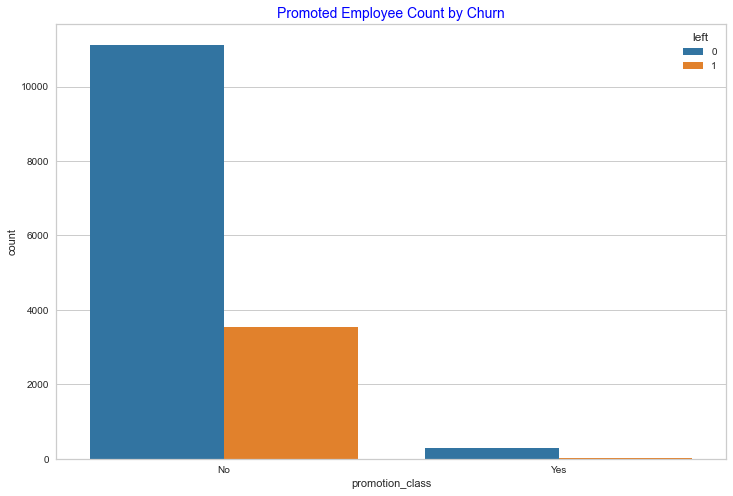

In [38]:
plt.figure(figsize=(12, 8))
plt.title("Promoted Employee Count by Churn", c="blue", size=14)
sns.countplot(x="promotion_class", hue="left", data=df, palette="tab10")
plt.show()

In [39]:
df.groupby("promotion_class")["left"].value_counts(normalize=True)

promotion_class  left
No               0      0.76
                 1      0.24
Yes              0      0.94
                 1      0.06
Name: left, dtype: float64

* Promoted employees have lower churn rate.

### Subplots of Features


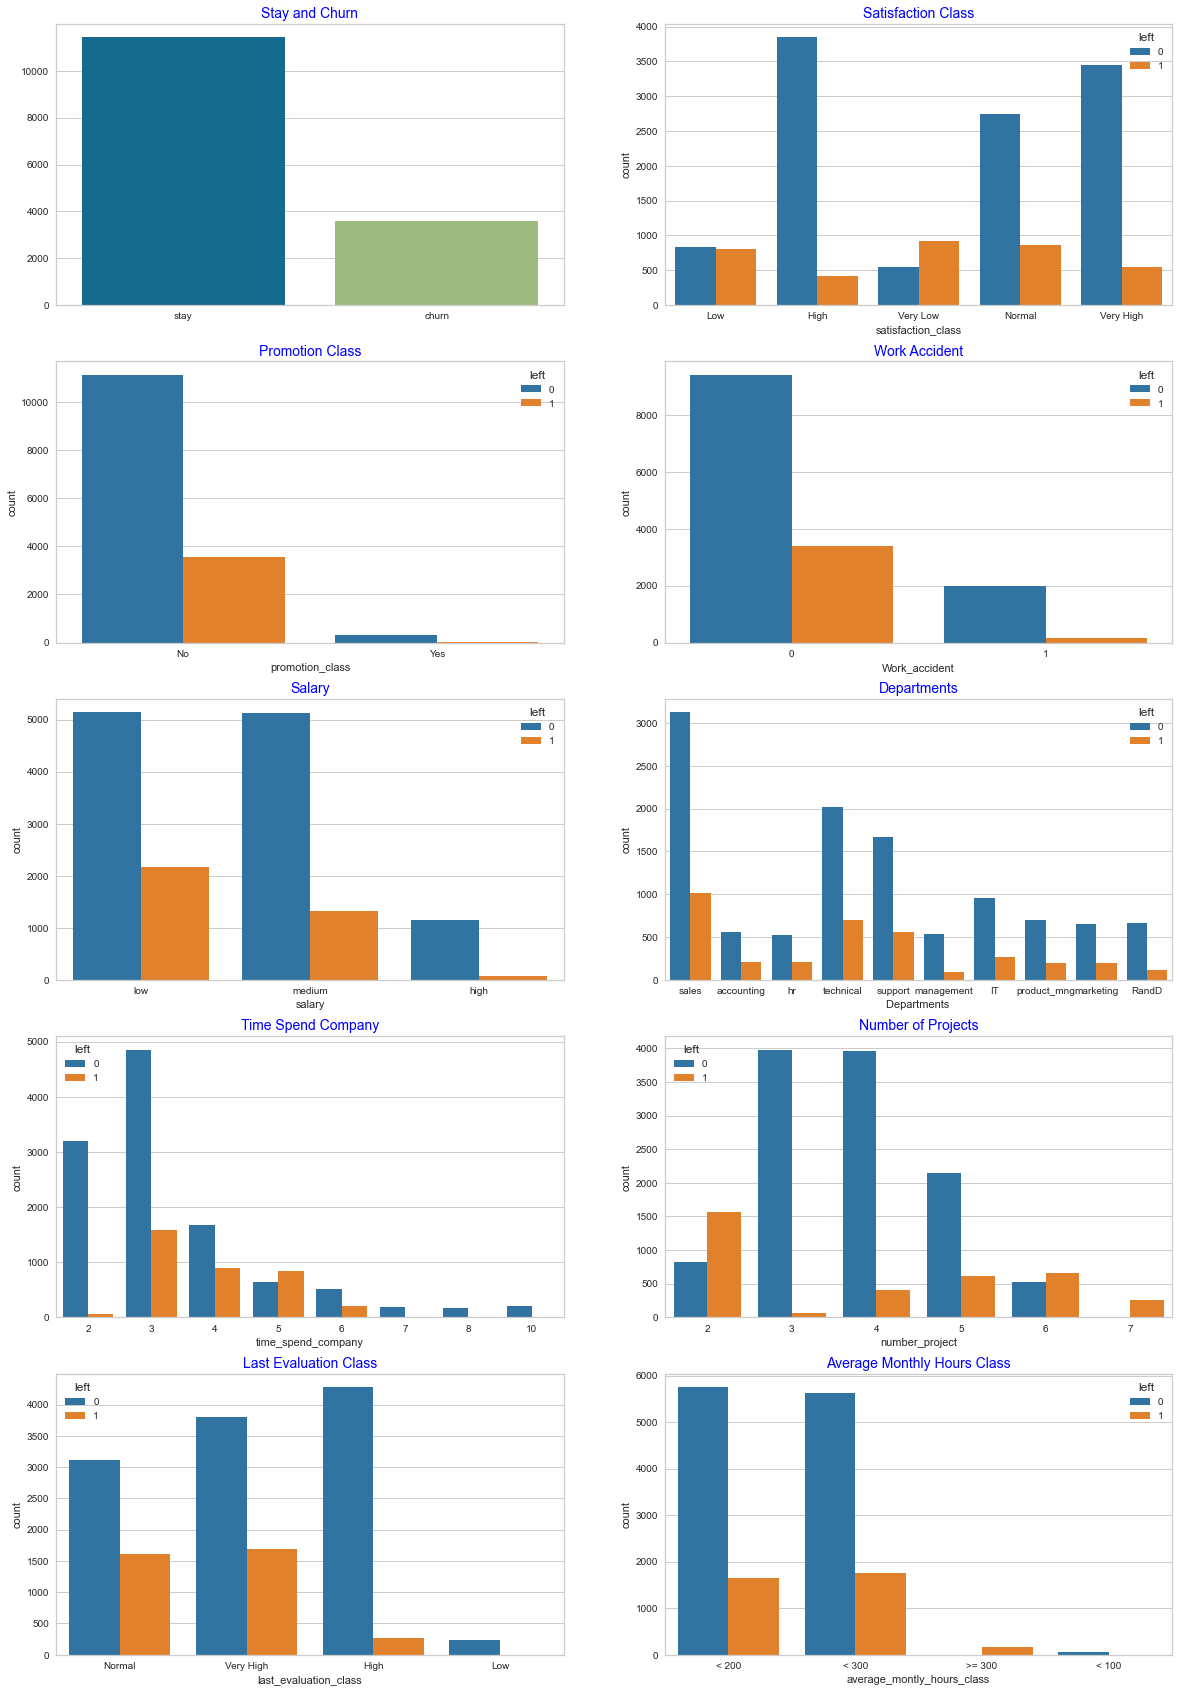

In [40]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,30))

sns.barplot(x=emp.unique(), y=emp.value_counts().values, ax=ax[0,0])
ax[0,0].set_title("Stay and Churn", c="blue", size=14)

sns.countplot(x="satisfaction_class", hue="left", data=df, palette="tab10", ax=ax[0,1])
ax[0,1].set_title("Satisfaction Class", c="blue", size=14)

sns.countplot(x="promotion_class", hue="left", data=df, palette="tab10", ax=ax[1,0])
ax[1,0].set_title("Promotion Class", c="blue", size=14)

sns.countplot(x="Work_accident", hue="left", data=df, palette="tab10", ax=ax[1,1])
ax[1,1].set_title("Work Accident", c="blue", size=14)

sns.countplot(x="salary", hue="left", data=df, palette="tab10", ax=ax[2,0])
ax[2,0].set_title("Salary", c="blue", size=14)

sns.countplot(x="Departments ", hue="left", data=df, palette="tab10", ax=ax[2,1])
ax[2,1].set_title("Departments", c="blue", size=14)

sns.countplot(x="time_spend_company", hue="left", data=df, palette="tab10", ax=ax[3,0])
ax[3,0].set_title("Time Spend Company", c="blue", size=14)

sns.countplot(x="number_project", hue="left", data=df, palette="tab10", ax=ax[3,1])
ax[3,1].set_title("Number of Projects", c="blue", size=14)

sns.countplot(x="last_evaluation_class", hue="left", data=df, palette="tab10", ax=ax[4,0])
ax[4,0].set_title("Last Evaluation Class", c="blue", size=14)

sns.countplot(x="average_montly_hours_class", hue="left", data=df, palette="tab10", ax=ax[4,1])
ax[4,1].set_title("Average Monthly Hours Class", c="blue", size=14)

plt.show()

The columns that we created for visualization will cause multicollinearity. So that, we will drop them. 

In [41]:
df.drop(["satisfaction_class", "last_evaluation_class", "average_montly_hours_class", "promotion_class"], axis=1, inplace=True)

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [42]:
# Standart Scaler

df2 = df.drop("left", axis=1)

target = df["left"]

scale = StandardScaler()
sc = scale.fit_transform(df2[df2.columns[:-2]])
df3 = pd.DataFrame(sc, columns=df2.columns[:-2])
df3 = df3.join(pd.get_dummies(df2["Departments "]))
df3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,-0.94,-1.09,-1.46,-0.88,-0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0
1,0.75,0.84,0.97,1.22,1.71,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0
2,-2.02,0.96,2.59,1.42,0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0
3,0.43,0.90,0.97,0.44,1.03,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0
4,-0.98,-1.15,-1.46,-0.84,-0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0


#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [43]:
# LabelEncoder

le = LabelEncoder()
df3["salary"] = le.fit_transform(df2["salary"])
df3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
0,-0.94,-1.09,-1.46,-0.88,-0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0,1
1,0.75,0.84,0.97,1.22,1.71,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0,2
2,-2.02,0.96,2.59,1.42,0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0,2
3,0.43,0.90,0.97,0.44,1.03,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0,1
4,-0.98,-1.15,-1.46,-0.84,-0.34,-0.41,-0.15,0,0,0,0,0,0,0,1,0,0,1


## 4. Cluster Analysis

### The Elbow Method

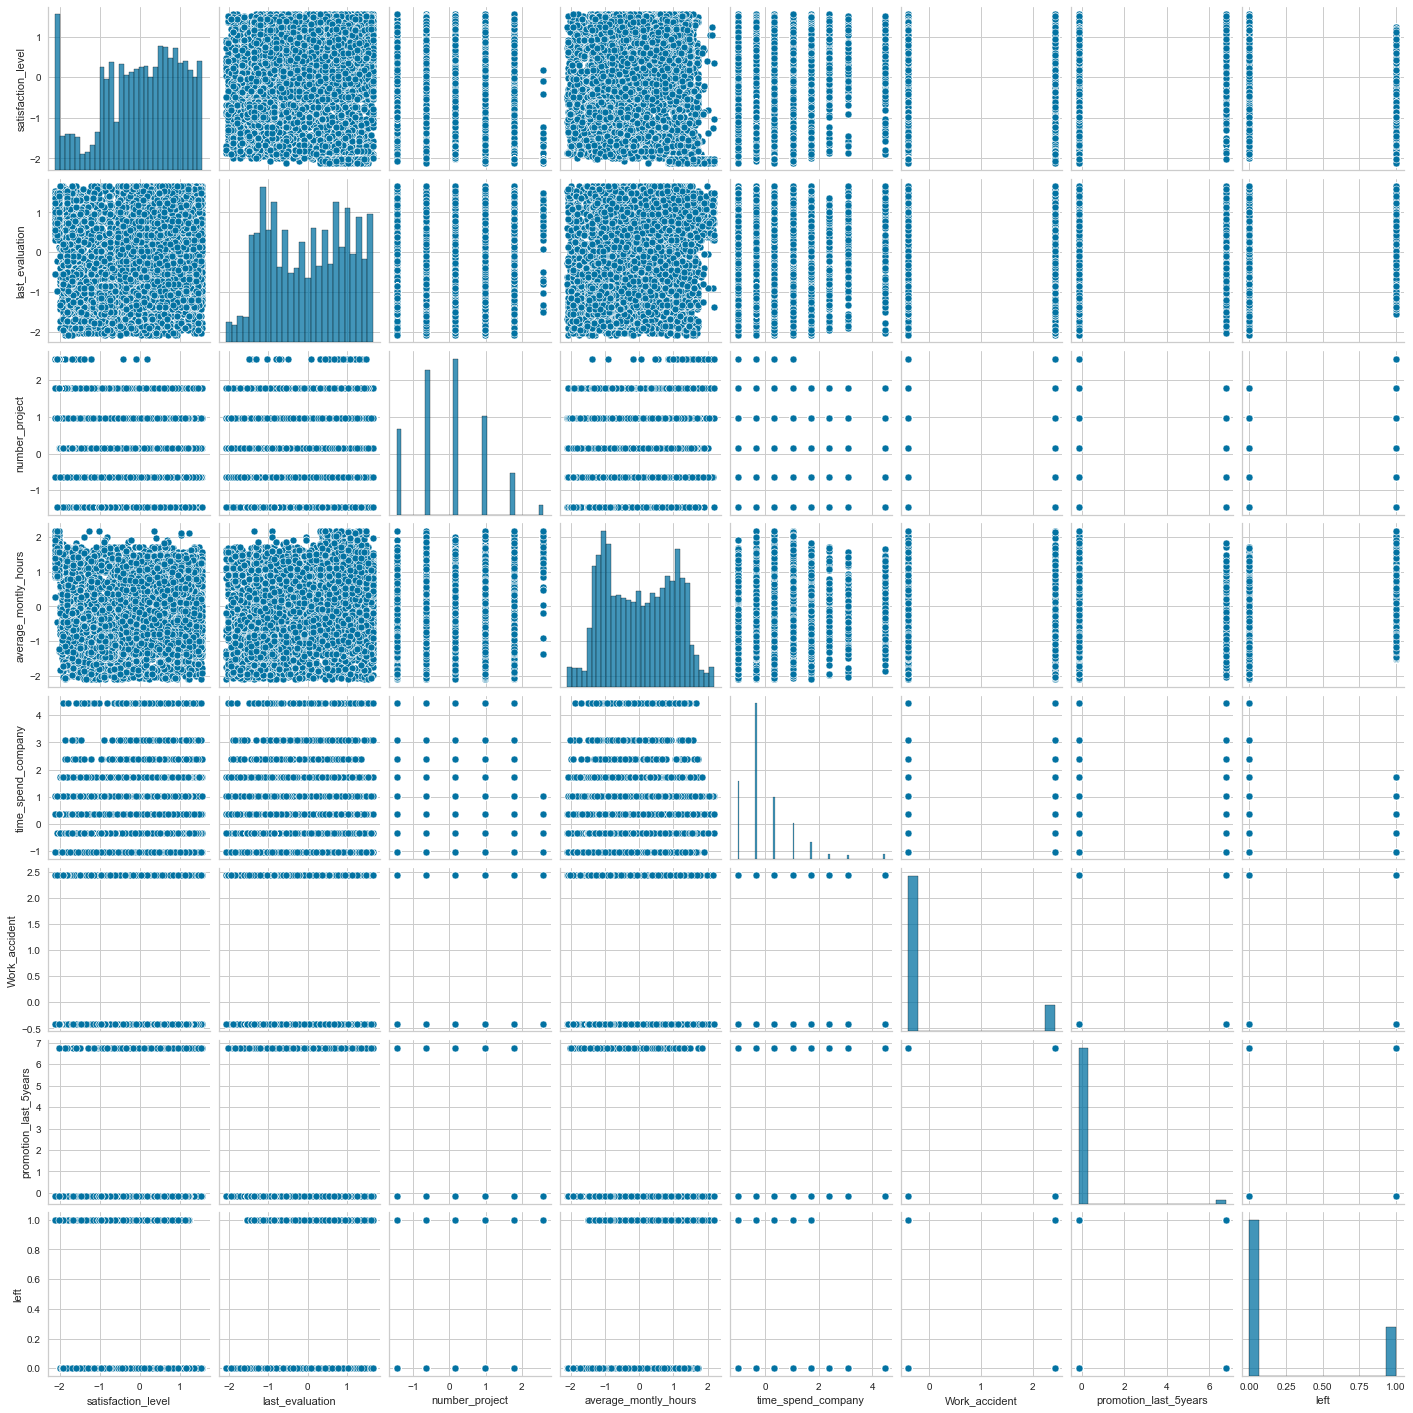

In [44]:
sns.pairplot(df3[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']].join(target))

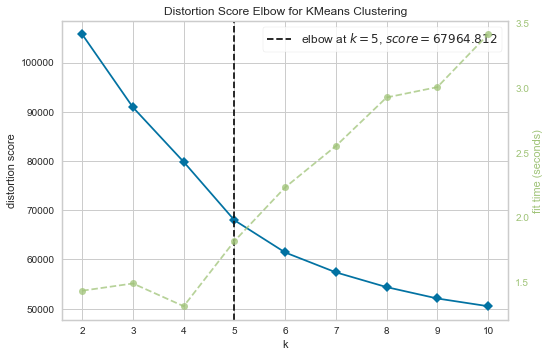

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Elbow Method with Yellowbrick

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans)
visualizer.fit(df3)
visualizer.show()

In [46]:
# Silhouette Score

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3)
    print(f"K Means Clustering --> n={i} and Silhouette Score =",silhouette_score(df3, kmeans.labels_))

K Means Clustering --> n=2 and Silhouette Score = 0.17353506358868384
K Means Clustering --> n=3 and Silhouette Score = 0.17606532015212614
K Means Clustering --> n=4 and Silhouette Score = 0.21293281209001913
K Means Clustering --> n=5 and Silhouette Score = 0.20875775252731327
K Means Clustering --> n=6 and Silhouette Score = 0.21601752477579905
K Means Clustering --> n=7 and Silhouette Score = 0.1946952423852798
K Means Clustering --> n=8 and Silhouette Score = 0.19640755687308487
K Means Clustering --> n=9 and Silhouette Score = 0.19009181952774307


* We got lower silhouette score for entire dataset. If we narrrow features we can get better silhouette score.

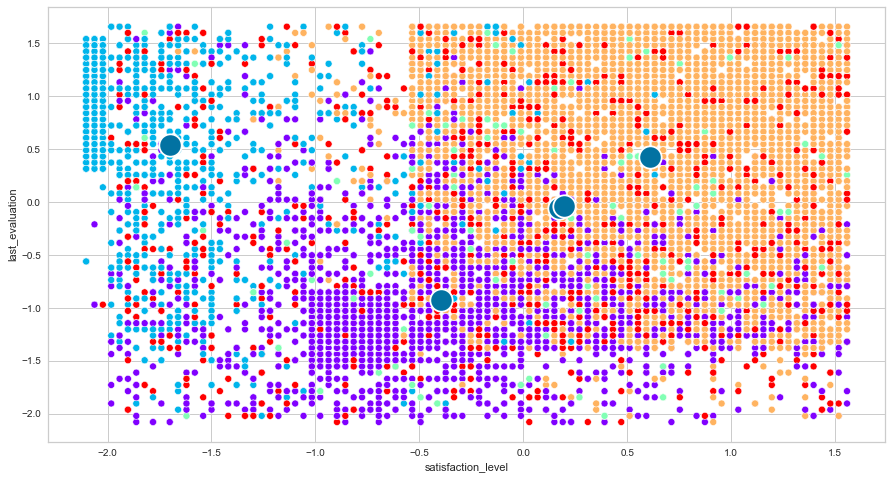

In [47]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

df3["cluster_label"] = kmeans.labels_

plt.figure(figsize=(15,8))
centroids = kmeans.cluster_centers_
sns.scatterplot(df3.iloc[:,0], df3.iloc[:, 1], c=df3["cluster_label"], cmap="rainbow")
sns.scatterplot(list(centroids[:,0]), list(centroids[:,1]), s=500)
plt.show()

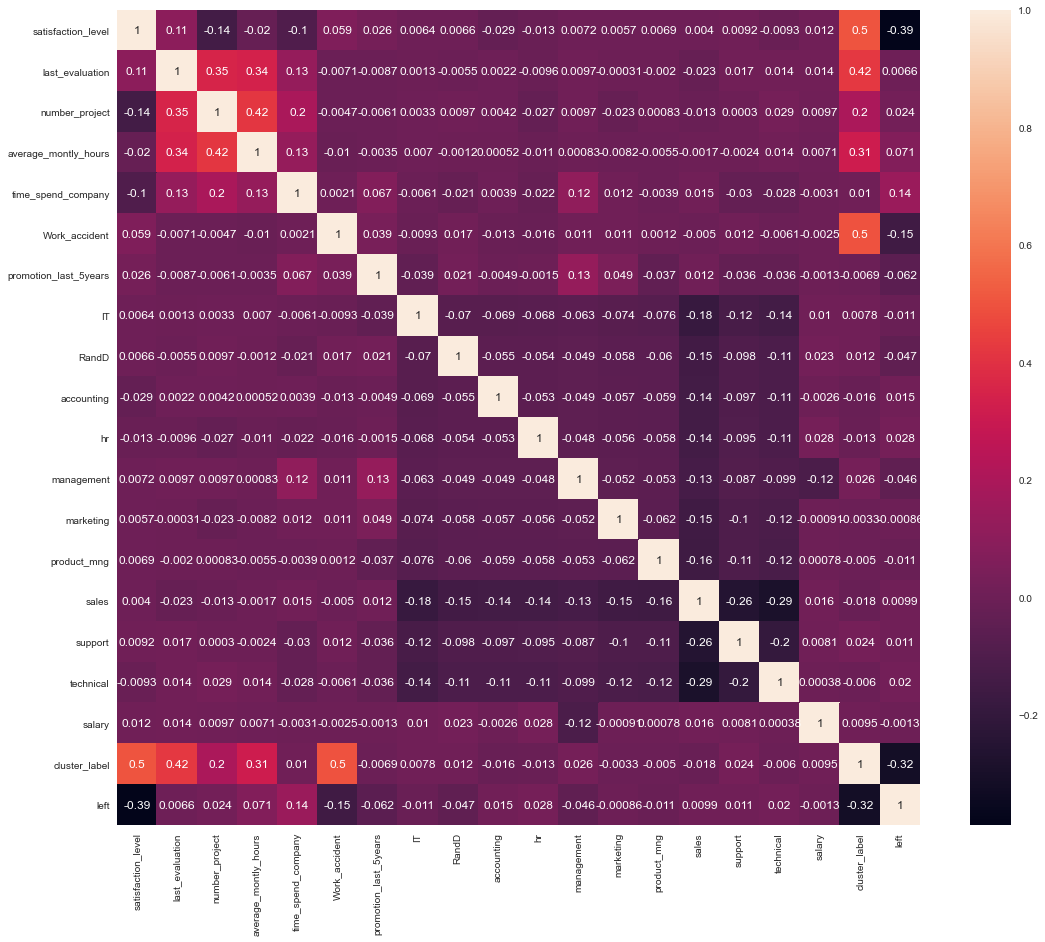

In [48]:
plt.figure(figsize=(18,15))
sns.heatmap(df3.join(target).corr(), annot=True);

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [49]:
# Splitting Data

X = df3
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Gradient Boosting Classifier

#### Model Building

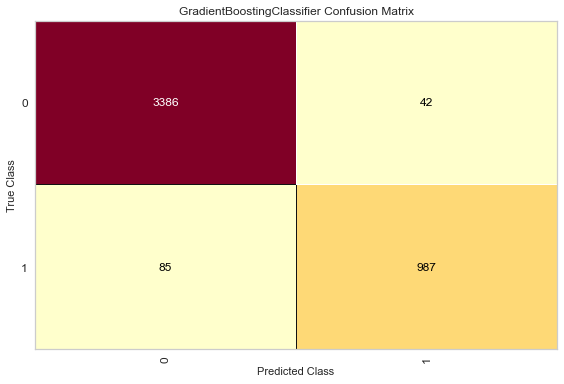

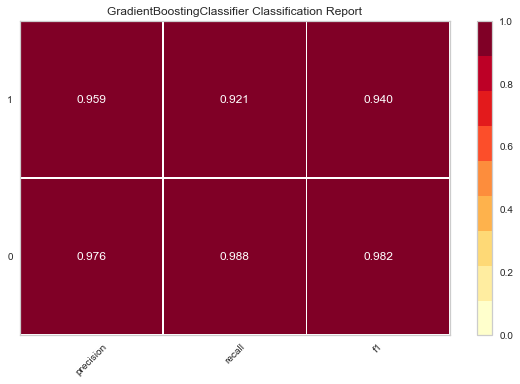

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [50]:
grad = GradientBoostingClassifier() # Building model
grad.fit(X_train, y_train)
y_pred_grad = grad.predict(X_test)

viz = ConfusionMatrix(GradientBoostingClassifier()) # Confusion Matrix by Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(GradientBoostingClassifier()) # Classification Report with Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Evaluating Model Performance

In [51]:
# Params for Grid and Randomized Search

grad_params = {"loss":["deviance", "exponential"], 
               "learning_rate":[0.01, 0.05, 0.1, 1],
               "n_estimators":[50, 100, 200, 500],
               "criterion":["friedman_mse", "mse", "mae"],
               "max_features":["auto", "sqrt", "log2"]}

I chose RandomizedSearch because it is less time consuming.

In [52]:
# Randomized Search

grad_cv = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=grad_params, n_jobs=-1, cv=5).fit(X_train, y_train)
grad_cv.best_params_

{'n_estimators': 50,
 'max_features': 'auto',
 'loss': 'exponential',
 'learning_rate': 1,
 'criterion': 'friedman_mse'}

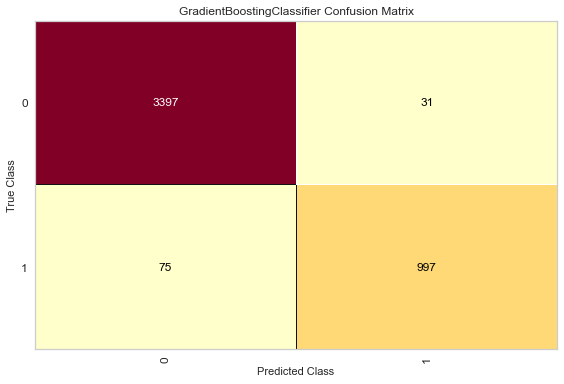

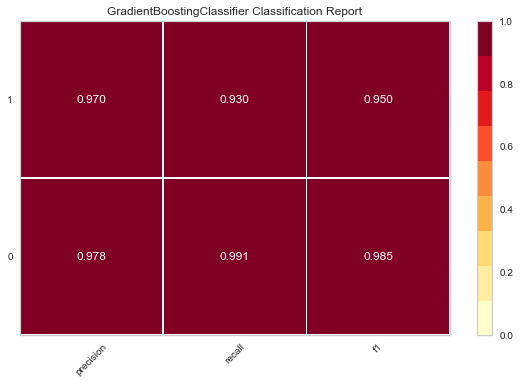

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [53]:
# Tuned Model

grad_tuned = GradientBoostingClassifier(n_estimators=500, max_features="auto", loss="exponential", learning_rate=1, criterion="friedman_mse")
grad_tuned.fit(X_train, y_train)
y_pred_grad_tuned = grad_tuned.predict(X_test)

viz = ConfusionMatrix(GradientBoostingClassifier(n_estimators=500, max_features="auto", loss="exponential", learning_rate=0.1, criterion="friedman_mse"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(GradientBoostingClassifier(n_estimators=500, max_features="auto", loss="exponential", learning_rate=0.1, criterion="friedman_mse"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Cross Validation

In [54]:
grad_tuned_cv_score = cross_validate(GradientBoostingClassifier(n_estimators=500, max_features="auto", loss="exponential", learning_rate=1, criterion="friedman_mse"), X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)
grad_tuned_cv_f1_score = grad_tuned_cv_score["test_f1_score"].mean()
grad_tuned_cv_accuracy_score = grad_tuned_cv_score["test_accuracy"].mean()
print("F1 score for Gradient Boosting Classifier:", grad_tuned_cv_f1_score)
print("Accuracy score for Gradient Boosting Classifier:", grad_tuned_cv_accuracy_score)

F1 score for Gradient Boosting Classifier: 0.9680769979729078
Accuracy score for Gradient Boosting Classifier: 0.9848556455454979


### KNeighbors Classifier

#### Model Building

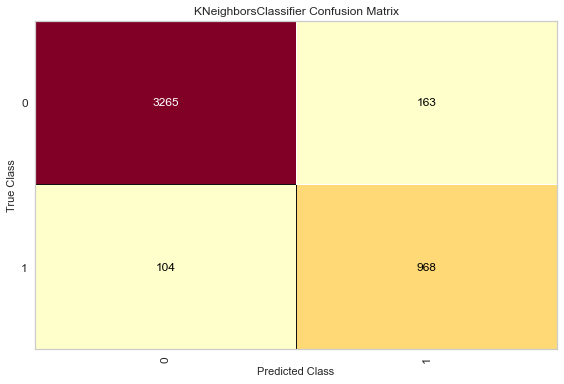

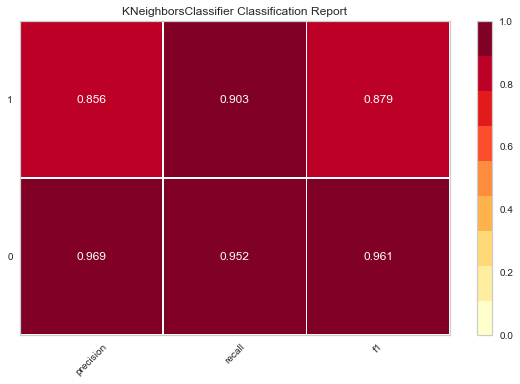

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [55]:
knn = KNeighborsClassifier() # Building model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

viz = ConfusionMatrix(KNeighborsClassifier()) # Confusion Matrix by Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(KNeighborsClassifier()) # Classification Report with Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Evaluating Model Performance

In [56]:
# Params for Grid and Randomized Search

knn_params = {"n_neighbors":[3, 5, 7, 9],
               "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
               "weights":["uniform", "distance"],
               "leaf_size":[10, 30, 50]}

In [57]:
# Randomized Search

knn_cv = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=knn_params, n_jobs=-1, cv=5).fit(X_train, y_train)
knn_cv.best_params_

{'weights': 'distance',
 'n_neighbors': 5,
 'leaf_size': 50,
 'algorithm': 'kd_tree'}

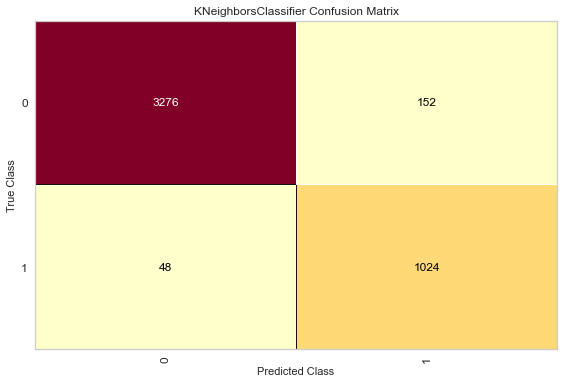

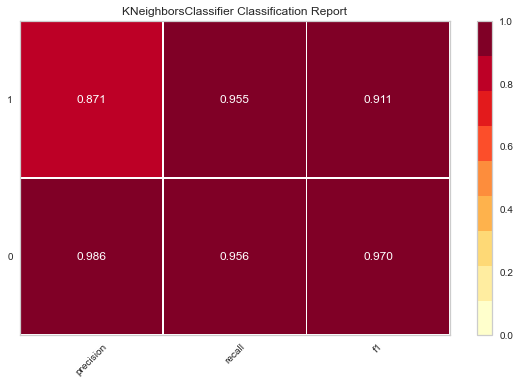

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [58]:
# Tuned Model

knn_tuned = KNeighborsClassifier(weights="distance", n_neighbors=5, leaf_size=50, algorithm="auto")
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)

viz = ConfusionMatrix(KNeighborsClassifier(weights="distance", n_neighbors=5, leaf_size=50, algorithm="auto"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(KNeighborsClassifier(weights="distance", n_neighbors=5, leaf_size=50, algorithm="auto"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Cross Validation

In [59]:
knn_tuned_cv_score = cross_validate(KNeighborsClassifier(weights="distance", n_neighbors=5, leaf_size=50, algorithm="auto"), X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)
knn_tuned_cv_f1_score = knn_tuned_cv_score["test_f1_score"].mean()
knn_tuned_cv_accuracy_score = knn_tuned_cv_score["test_accuracy"].mean()
print("F1 score for K Neighbor Classifier:", knn_tuned_cv_f1_score)
print("Accuracy score for K Neighbor Classifier:", knn_tuned_cv_accuracy_score)

F1 score for K Neighbor Classifier: 0.918437171952219
Accuracy score for K Neighbor Classifier: 0.9596153723995554


### Random Forest Classifier

#### Model Building

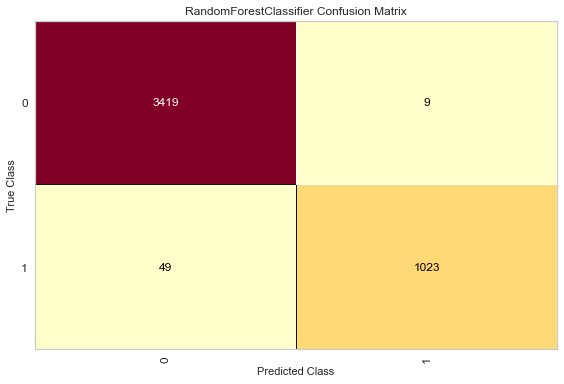

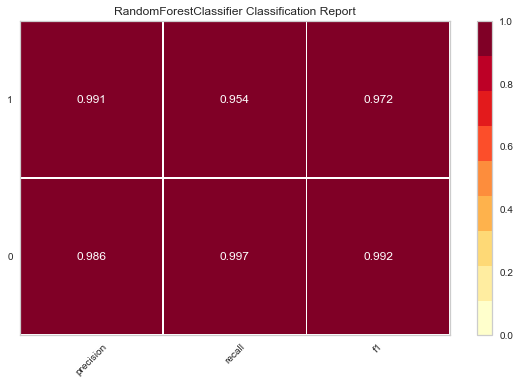

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [60]:
rfc = RandomForestClassifier() # Building model
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

viz = ConfusionMatrix(RandomForestClassifier()) # Confusion Matrix by Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(RandomForestClassifier()) # Classification Report with Yellowbrick
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Evaluating Model Performance

In [61]:
# Params for Grid and Randomized Search

rfc_params = {"n_estimators":[50, 100, 200, 500],
               "criterion":["gini", "entropy"],
               "min_samples_split":[2,3,4],
               "max_features":["auto", "sqrt", "log2"]}

In [62]:
# Randomized Search

rfc_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_params, n_jobs=-1, cv=5).fit(X_train, y_train)
rfc_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'auto',
 'criterion': 'gini'}

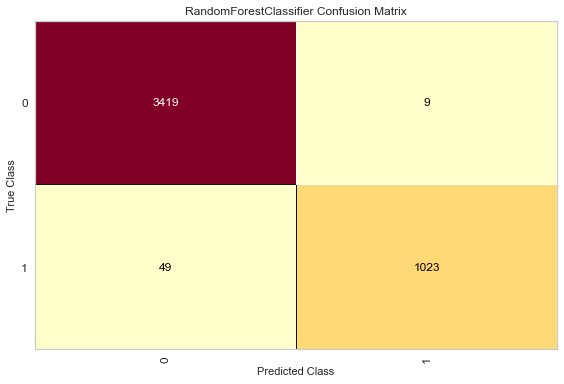

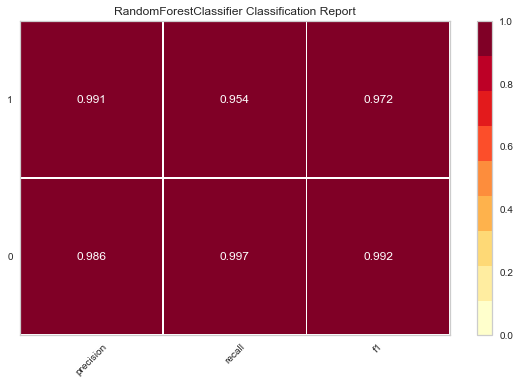

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [63]:
# Tuned Model

rfc_tuned = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features="auto", criterion="gini")
rfc_tuned.fit(X_train, y_train)
y_pred_rfc = rfc_tuned.predict(X_test)

viz = ConfusionMatrix(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features="auto", criterion="gini"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

print("\n")

viz = ClassificationReport(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features="auto", criterion="gini"))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Cross Validation

In [64]:
rfc_tuned_cv_score = cross_validate(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features="auto", criterion="gini"), X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)
rfc_tuned_cv_f1_score = rfc_tuned_cv_score["test_f1_score"].mean()
rfc_tuned_cv_accuracy_score = rfc_tuned_cv_score["test_accuracy"].mean()
print("F1 score for Random Forest Classifier:", rfc_tuned_cv_f1_score)
print("Accuracy score for Random Forest Classifier:", rfc_tuned_cv_accuracy_score)

F1 score for Random Forest Classifier: 0.9763808711929849
Accuracy score for Random Forest Classifier: 0.9889513827446177


### Comparing Models

In [65]:
metric = pd.DataFrame({"model":["Gradient Boosting Classifier", "K Nearest Neighbour Classifier", "Random Forest Classifier"],
                       "f1_score":[grad_tuned_cv_f1_score, knn_tuned_cv_f1_score, rfc_tuned_cv_f1_score],
                       "accuracy":[grad_tuned_cv_accuracy_score, knn_tuned_cv_accuracy_score, rfc_tuned_cv_accuracy_score]})

metric = metric.sort_values(by="f1_score")

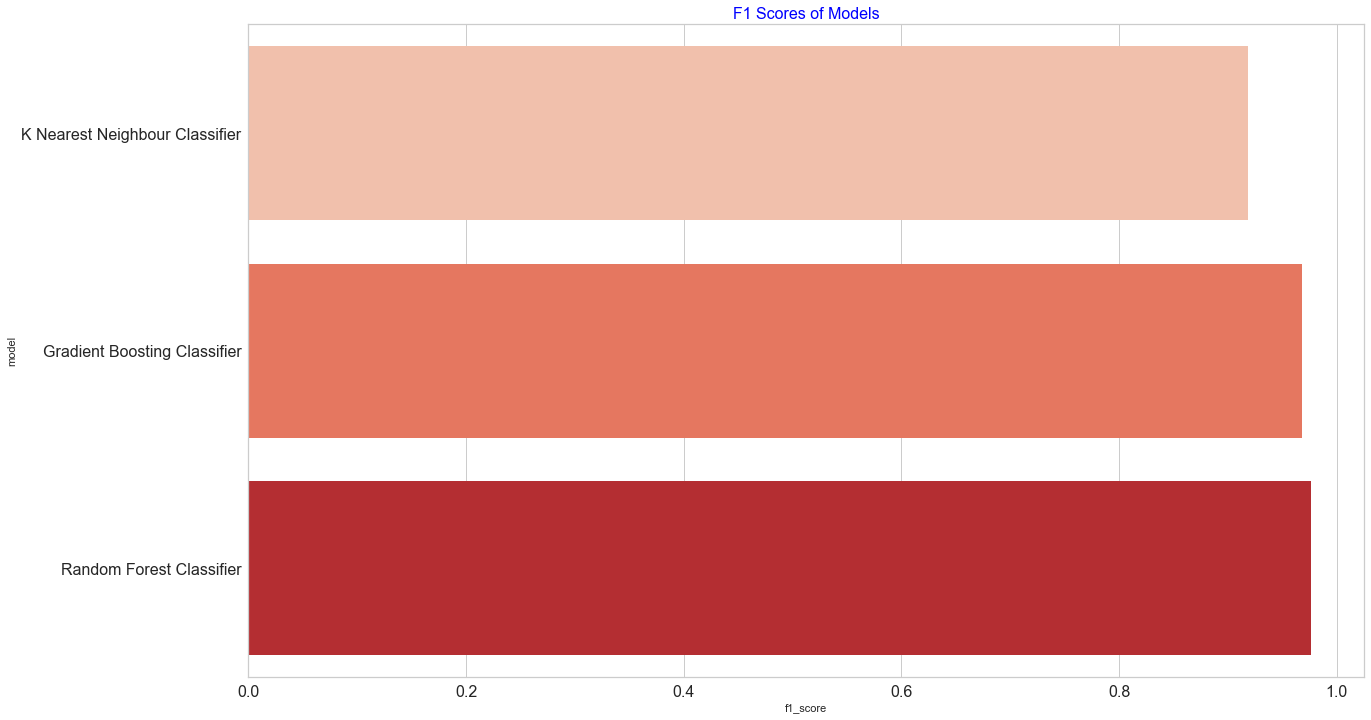

In [66]:
plt.figure(figsize=(20,12))

sns.barplot(x="f1_score", y="model", data=metric, palette="Reds")

plt.title("F1 Scores of Models", c="blue", size=16)
plt.yticks(size=16)
plt.xticks(size=16);

* Random Forest Classifier has the most f1 score by 0.98. I will choose Random Forest for further processes.

## 6. Model Deployment

### Saving and Exporting the Model as .pkl

In [68]:
pickle.dump(rfc_tuned, open("rfc_model.pkl", "wb"))

### Saving and Exporting Variables as .pkl

In [69]:
pickle.dump(scale, open("scaler.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))
pickle.dump(kmeans, open("kmeans.pkl", "wb"))